训练集标注可视化

In [90]:
%config InlineBackend.figure_format = 'retina'

In [91]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from glob import glob
import json
import numpy as np
from pathlib import Path
from tqdm import tqdm



# 按行生成彩色标注框
idx2color = []
for i in range(3):
    for j in range(3):
        for k in range(3):
            idx2color.append((i*100, j*100, k*100))
idx2color.append((255, 0, 0))
idx2color = np.array(idx2color)


def table_visualize(img_name, src_img, table, key='row', only_last=False):
    last_img = src_img.copy()
    for idx, row in enumerate(table[key]):
        color = idx2color[idx % len(idx2color)]
        pts = np.array(row, dtype=np.int32)
        if not only_last:
            temp_img = src_img.copy()
            cv2.polylines(temp_img, [pts], True, color.tolist(), 1)
        cv2.polylines(last_img, [pts], True, color.tolist(), 1)
        
        cx, cy = pts.mean(axis=0)
        if not only_last:
            cv2.putText(temp_img, str(idx), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
            plt.title(f"{img_name}: {key}")
            plt.imshow(temp_img)
            plt.show()
        cv2.putText(last_img, str(idx), (int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)
        last_img = cv2.cvtColor(last_img, cv2.COLOR_BGR2RGB)
    plt.title(f"{img_name}: {key}")
    plt.imshow(last_img)
    plt.show()

def label_visualize(img_name, src_img, label):
    for cell in label['cells']:
        start_row_idx = cell['row_start_idx']
        end_row_idx   = cell['row_end_idx']
        start_col_idx = cell['col_start_idx']
        end_col_idx   = cell['col_end_idx']
        color = idx2color[start_row_idx % len(idx2color)]
        x0, y0, x1, y1 = cell['bbox']

        pts = np.array(cell['segmentation'], dtype=np.int32)
        cv2.rectangle(src_img, (int(x0), int(y0)), (int(x1), int(y1)), color.tolist(), 1)

        theight = cv2.getTextSize(str(start_row_idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0][1]
        show_text = f"{start_row_idx}" if start_row_idx == end_row_idx else f"{start_row_idx}-{end_row_idx}"
        show_text += f",{start_col_idx}" if start_col_idx == end_col_idx else f" {start_col_idx}-{end_col_idx}"

        cv2.putText(src_img, show_text, (int(x0), int(y0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 1)
        # transcript = cell['transcript']
        # cv2.putText(src_img, transcript, (int(x0), int(y0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 1)
        plt.title(img_name)
        plt.imshow(src_img)
    plt.show()

def rotate_label_visualize(img_name, src_img, label):
    h, w = src_img.shape[:2]
    center = (w//2, h//2)
    M = cv2.getRotationMatrix2D(center, -1, 1.0)
    src_img = cv2.warpAffine(src_img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    # src_img = cv2.warpAffine(src_img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

    for cell in label['cells']:
        start_row_idx = cell['row_start_idx']
        end_row_idx   = cell['row_end_idx']
        start_col_idx = cell['col_start_idx']
        end_col_idx   = cell['col_end_idx']
        color = idx2color[start_row_idx % len(idx2color)]
        x0, y0, x1, y1 = cell['bbox']
        print(1, type(cv2.transform(np.array([[[x0, y0], [x1, y1]]]), M)))
        print(2, type(cv2.transform(np.array([[[x0, y0], [x1, y1]]]), M).squeeze()))
        [x0, y0], [x1, y1] = cv2.transform(np.array([[[x0, y0], [x1, y1]]]), M).squeeze().astype(np.int32)

        pts = np.array(cell['segmentation'], dtype=np.int32)
        cv2.rectangle(src_img, (int(x0), int(y0)), (int(x1), int(y1)), color.tolist(), 1)

        theight = cv2.getTextSize(str(start_row_idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0][1]
        show_text = f"{start_row_idx}" if start_row_idx == end_row_idx else f"{start_row_idx}-{end_row_idx}"
        show_text += f",{start_col_idx}" if start_col_idx == end_col_idx else f" {start_col_idx}-{end_col_idx}"

        cv2.putText(src_img, show_text, (int(x0), int(y0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 1)
        plt.title(img_name)
        plt.imshow(src_img)
    plt.show()





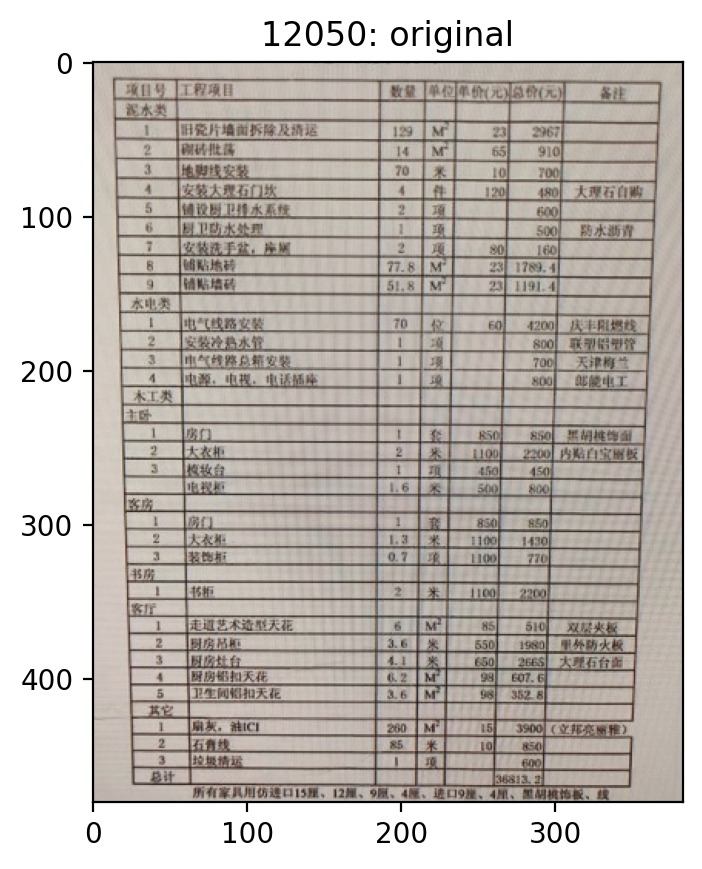

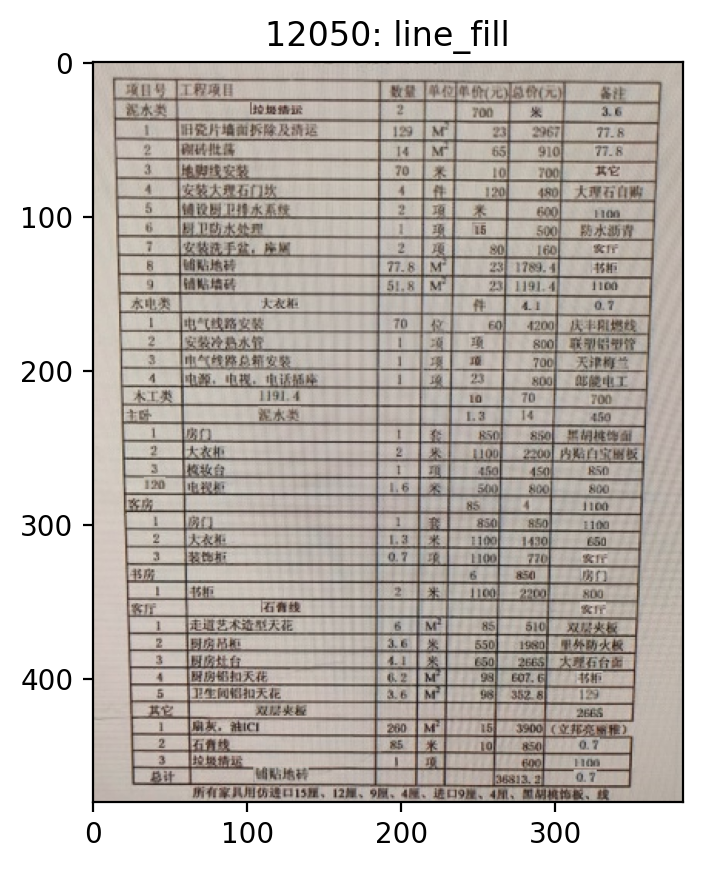

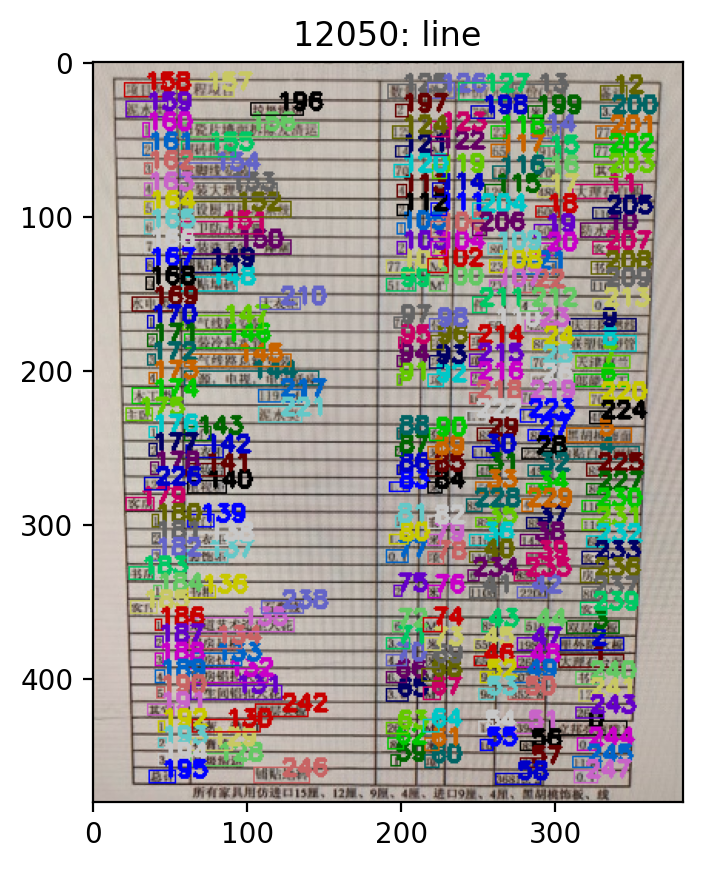

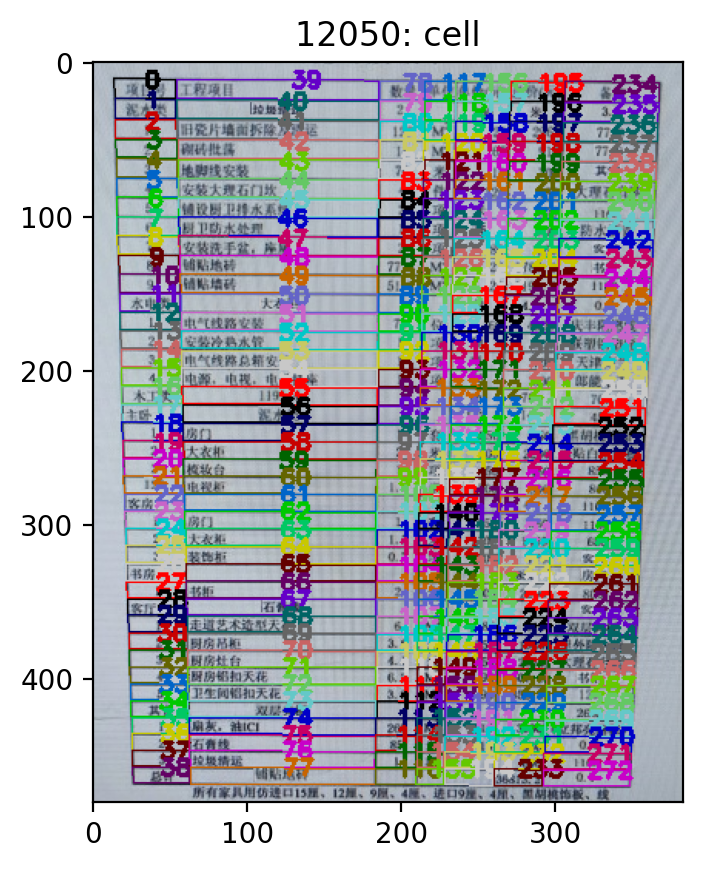

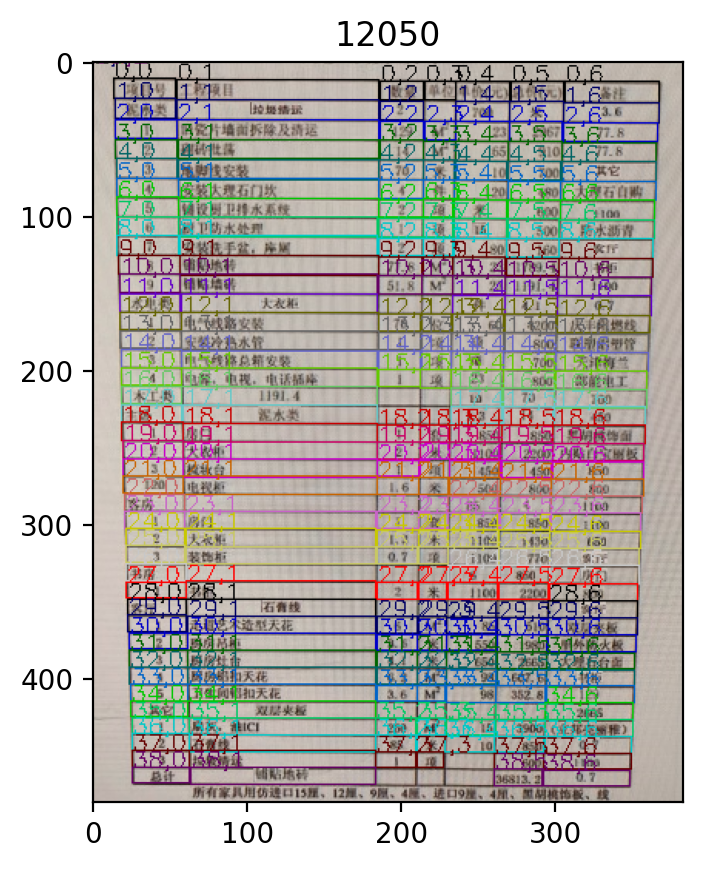

[[  0   1   2   3   4   5   6]
 [  7   8   9  10  11  12  13]
 [ 14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27]
 [ 28  29  30  31  32  33  34]
 [ 35  36  37  38  39  40  41]
 [ 42  43  44  45  46  47  48]
 [ 49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62]
 [ 63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76]
 [ 77  78  79  80  81  82  83]
 [ 84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97]
 [ 98  99 100 101 102 103 104]
 [105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118]
 [119 120 121 122 123 124 125]
 [126 127 128 129 130 131 132]
 [133 134 135 136 137 138 139]
 [140 141 142 143 144 145 146]
 [147 148 149 150 151 152 153]
 [154 155 156 157 158 159 160]
 [161 162 163 164 165 166 167]
 [168 169 170 171 172 173 174]
 [175 176 177 178 179 180 181]
 [182 183 184 185 186 187 188]
 [189 190 191 192 193 194 195]
 [196 197 198 199 200 201 202]
 [203 204 205 206 207 208 209]
 [210 211 212 213 214 215 216]
 [217 218 219 220 221 222 223]
 [224 22

In [92]:
import utils.table2label as table2label
import random
import shapely
import copy
'''
可视化单一图像
'''
img_id = '00849'
img_id = '00838'
img_id = '00741'
img_id = '02078'
img_id = '00075'
img_id = '00169'
img_id = '00425'
img_id = '00761'
img_id = '00856'
img_id = '00001'
img_id = '00009'
img_id = '00023'
img_id = '00027'
img_id = '00029'
img_id = '00033'
img_id = '00034'
img_id = '08532' # table error
img_id = '10552' # table error
img_id = '00021' # ok | line 40 not find
img_id = '00057' # ok | line 34 not find
img_id = '00084' # ok | line 20,61,62,103,104 not find
img_id = '00169' # ok | line 0,2,9,10,16,17 not find
img_id = '00250' # ok | line 6 not find
img_id = '00273' # 单行标注，但列标注分为多行
img_id = '00301' # 单行标注，但列标注分为多行
img_id = '00303' # 单行标注，但列标注分为多行
img_id = '00307' # 单行标注，但列标注分为多行
img_id = '02572' # 单行标注，但列标注分为多行
img_id = '06615' # 
img_id = '02078' # ok
img_id = '12094' # ok | line 10 not find
img_id = '12077' # 格子太多了
img_id = '12058' # ok | 单行标注按line划分的，非法
img_id = '12035' # ok | 单行标注按line划分的，非法
img_id = '04503' # ok | 单行标注按line划分的，非法
img_id = '00280' # 行标注坐标遗漏line
img_id = '08532' # 行标注坐标遗漏line
img_id = '00856' # 行标注坐标遗漏line
img_id = '03161' # 行标注坐标遗漏line
img_id = '05058' # 行标注坐标遗漏line
img_id = '06584' # line15 标注问题
img_id = '06616' #
img_id = '07156' #
img_id = '07087' #
img_id = '12058'
img_id = '12050'


# img_id = '12053' # ok
# img_id = '12058' # row cell label multiple
# img_id = '12094' # cell label lost
jpg_path  = f"/media/ubuntu/Date12/TableStruct/new_data/train_jpg480max/{img_id}.jpg"
json_path = f"/media/ubuntu/Date12/TableStruct/new_data/train_jpg480max/{img_id}.json"

img_array = cv2.imread(jpg_path)
rc_label = json.load(open(json_path, 'r'))
# rc_label['is_wireless'] = True

unique_values, value_counts = np.unique(img_array.reshape(-1, img_array.shape[-1]), axis=0, return_counts=True)
common_value = unique_values[np.argmax(value_counts)]
plt.title(f"{img_id}: original")
plt.imshow(img_array)
plt.show()

# table_visualize(img_id, img_array, rc_label, 'line', only_last=True)

# for line_seg in table['line']:
    # bbox = table2label.segmentation_to_bbox([line_seg])
    # x0, y0, x1, y1 = bbox
    # img_array[int(y0):int(y1), int(x0):int(x1)] = common_value
    # cv2.fillPoly(img_array, np.array([line_seg], dtype=np.int32), color=common_value.tolist())
# table_visualize(img_id, img_array, table, 'cell', only_last=True)


n_row = len(rc_label['row'])
n_col = len(rc_label['col'])

def segmentation_to_polygon(segmentation):
    polygon = shapely.Polygon()
    for contour in segmentation:
        polygon = polygon.union(shapely.Polygon(contour))
    return polygon


row_polys = [segmentation_to_polygon([row]) for row in rc_label['row']]
col_polys = [segmentation_to_polygon([col]) for col in rc_label['col']]
line_polys = [segmentation_to_polygon([line]) for line in rc_label['line']]

H, W = img_array.shape[:2]

temp_img = copy.deepcopy(img_array)
min_area = float('inf')
line_num = len(rc_label['line'])
for row_poly in row_polys:
    for col_poly in col_polys:
        if row_poly.intersects(col_poly):
            cell_poly = row_poly.intersection(col_poly)
        else:
            continue

        if cell_poly.area < 0.002 * H * W:
            continue

        min_area = min(min_area, cell_poly.area)

        for line_poly in line_polys:
            if line_poly.intersects(cell_poly): # 一点重叠都不要有
                break
        else:
            # cv2.fillPoly(img_array, np.array([cross_poly.exterior.coords[:-1]], dtype=np.int32), color=(255, 0, 0))
            line_idxs = list(range(len(line_polys)))
            random.shuffle(line_idxs)
            # cell_w, cell_h = cross_poly.bounds[2]-cross_poly.bounds[0], cross_poly.bounds[3]-cross_poly.bounds[1]
            cell_w, cell_h = cell_poly.bounds[2]-cell_poly.bounds[0], cell_poly.bounds[3]-cell_poly.bounds[1]
            cell_cx, cell_cy = cell_poly.centroid.coords[0]
            cell_cx, cell_cy = int(cell_cx), int(cell_cy)
            for idx in line_idxs:
                line_poly = line_polys[idx]
                line_w, line_h = line_poly.bounds[2]-line_poly.bounds[0], line_poly.bounds[3]-line_poly.bounds[1]
                if line_poly.area < cell_poly.area * 0.25 and  cell_w * 0.2 < line_w < cell_w * 0.5 and  cell_h * 0.2 < line_h < cell_h * 0.8:
                    x0, y0, x1, y1 = line_poly.bounds
                    w, h = int(x1-x0+1), int(y1-y0+1)
                    x0, y0 = int(x0), int(y0)
                    cell_x0, cell_y0 = int(cell_cx-w//2), int(cell_cy-h//2)
                    if cell_x0 < 0 or cell_y0 < 0 or cell_x0+w > W or cell_y0+h > H:
                        continue
                    try:
                        img_array[cell_y0:cell_y0+h, cell_x0:cell_x0+w] = img_array[y0:y0+h, x0:x0+w]
                        line_poly = shapely.Polygon([[cell_x0, cell_y0], [cell_x0, cell_y0+h],
                                             [cell_x0+w, cell_y0+h], [cell_x0+w, cell_y0]])
                        rc_label['line'].append(cell_poly.intersection(line_poly).exterior.coords[:-1])
                        # print(f"{len(rc_label['line'])} line added by {idx})")
                    except:
                        pass
                    break

plt.title(f"{img_id}: line_fill")
plt.imshow(img_array)
plt.show()


# print(np.unique(src_img, return_counts=True))
# print(np.argmax(np.unique(src_img, return_counts=True)[1]))

# mode = np.unique(src_img, return_counts=True)[0][np.argmax(np.unique(src_img, return_counts=True)[1])]

# if not table2label.table_valid(table):
#     print("table_valid error!", img_id)
# # table = table2label.fix_table_error(table)

# table_visualize(img_id, img_array, rc_label, 'row', only_last=False)
# table_visualize(img_id, img_array, rc_label, 'col', only_last=False)
table_visualize(img_id, img_array, rc_label, 'line', only_last=True)
table_visualize(img_id, img_array, rc_label, 'cell', only_last=True)
#layout = table2label.table2layout(table)
label = table2label.table2label(rc_label)
label_visualize(img_id, img_array, label)
print(np.array(label['layout']))

valid, msg = table2label.judge_error(rc_label, label)

print(f"min area: {min_area}", W*H, min_area/(W*H))